In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('weight_data.csv')
x_values = np.arange(np.floor(df['x1'].min()), np.ceil(df['x2'].max()) + 1, 1)
total_weight = np.zeros_like(x_values, dtype=float)

In [ ]:
def interpolate_weights(df, x_values):
    global total_weight
    for _, row in df.iterrows():
        mask = (x_values >= row.x1) & (x_values <= row.x2)
        total_weight[mask] += np.interp(x_values[mask], [row.x1, row.x2], [row.l1, row.l2])

interpolate_weights(df, x_values)

In [ ]:
weight_table = pd.DataFrame({'x': x_values, 'W': total_weight})
print(weight_table)
weight_table.to_excel('result.xlsx', index=False)

         x          W
0     -4.0   0.000000
1     -3.0  34.799718
2     -2.0  34.958931
3     -1.0  46.659811
4      0.0  46.819025
..     ...        ...
165  161.0  30.899644
166  162.0  29.491415
167  163.0  28.083185
168  164.0   3.372091
169  165.0   0.000000

[170 rows x 2 columns]


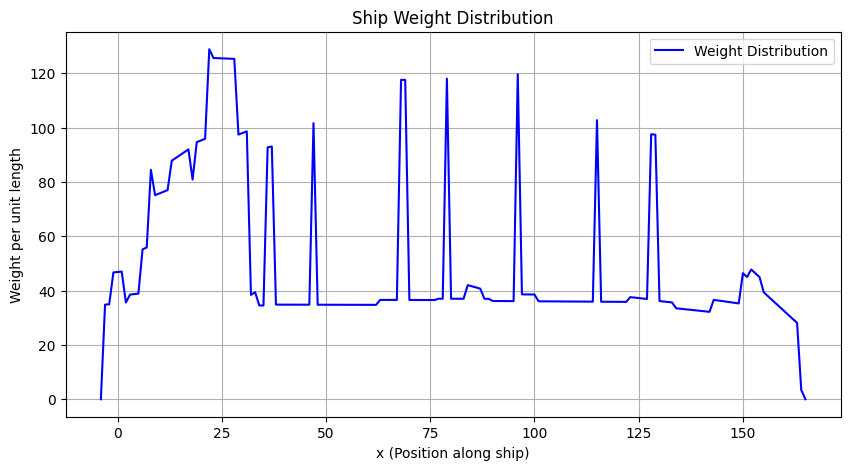

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, total_weight, label='Weight Distribution', color='b')
plt.xlabel('x (Position along ship)')
plt.ylabel('Weight per unit length')
plt.title('Ship Weight Distribution')
plt.legend()
plt.grid()
plt.show()

In [ ]:
weight=np.trapz(total_weight,x_values)
print(weight)

8329.839705555023


In [ ]:
lcg=np.trapz(total_weight*x_values, x_values)/weight
print(lcg)

68.82575973702562
